In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data=pd.read_csv("D:/ASSIGNMENTS/Clustering/crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [4]:
data[data.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [5]:
def norm_func(i):
    x=(i-i.min()/i.max()-i.min())
    return(x)

In [6]:
df_norm=norm_func(data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,12.354023,190.866469,25.648352,13.741304
1,9.154023,217.866469,15.648352,37.041304
2,7.254023,248.866469,47.648352,23.541304
3,7.954023,144.866469,17.648352,12.041304
4,8.154023,230.866469,58.648352,33.141304
5,7.054023,158.866469,45.648352,31.241304
6,2.454023,64.866469,44.648352,3.641304
7,5.054023,192.866469,39.648352,8.341304
8,14.554023,289.866469,47.648352,24.441304
9,16.554023,165.866469,27.648352,18.341304


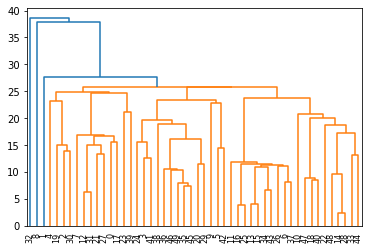

In [7]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='single'))

In [8]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')

In [21]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,0
8,2
9,0


In [11]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [12]:
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2])

In [19]:
md=pd.Series(model.labels_)
data['clust']=md
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,12.354023,190.866469,25.648352,13.741304
1,9.154023,217.866469,15.648352,37.041304
2,7.254023,248.866469,47.648352,23.541304
3,7.954023,144.866469,17.648352,12.041304
4,8.154023,230.866469,58.648352,33.141304


In [20]:
data.iloc[:,1:7].groupby(data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,11.812500,272.562500,68.312500,28.375000,0
1,5.590000,112.400000,65.600000,17.270000,1
2,8.214286,173.285714,70.642857,22.842857,2
3,2.950000,62.700000,53.900000,11.510000,3


In [31]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [40]:
crime=pd.read_csv("D:/ASSIGNMENTS/Clustering/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [59]:
crime1=crime.iloc[:,1:6]
crime1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [61]:
array=crime1.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [63]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [64]:
dbscan=DBSCAN(eps=0.8,min_samples=5)

In [65]:
dbscan.fit(X)

DBSCAN(eps=0.8)

In [66]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  0],
      dtype=int64)

In [68]:
cl=pd.DataFrame(dbscan.labels_,columns=["cluster"])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1
